# Тестовое задание в ТУТУ ру
---

Вы - аналитик интернет-магазина, который продает одежду, обувь и аксессуары. У вас в распоряжении исторические данные по количеству звонков и затраченных операторами минут на каждое из направлений бизнеса. Заказчик хотел бы понимать, какие затраты на контакт-центр понесет компания в мае в разрезе трех департаментов при условии, что обращения по направлениям Одежда и Аксессуары могут обрабатывать одни и те же операторы, а по направлению Обувь - операторы с другими скилами. Компания придерживается рыночных стандартов целевых показателей и SL = 80/20. https://www.mightycall.ru/kalkulyator-erlanga-s/ сайт может вам пригодиться, стоимость одного оператора для компании 200 руб./ч, контакт-центр обслуживает 24/7.

В ответе прошу продемонстрировать не только расчеты, но и предположения, выводы, графики.

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy
plt.style.use('ggplot')
%matplotlib

Using matplotlib backend: Qt5Agg


In [4]:
df = pd.read_csv('hw_data.csv', sep=';')
df.head()

,ds,department,calls,minutes
0,01.01.2018,Accessorize,79,324
1,01.01.2018,Clothes,523,2078
2,01.01.2018,Shoes,138,744
3,02.01.2018,Accessorize,104,413
4,02.01.2018,Clothes,599,2152


Преобразуем текстовое выражение даты в тип для дальнейших манипуляций

In [5]:
df['dt'] = df['ds'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y')) 

Добавим столбец avg_min - среднее время обработки одного звонка

In [6]:
df['avg_min'] = df['minutes']/df['calls']
df['year'] = df['dt'].apply(lambda x: x.year)
df['month'] = df['dt'].apply(lambda x: x.month)

Так как по условию обращения по направлениям Одежда и Аксессуары могут обрабатывать одни и те же операторы, а по направлению Обувь - операторы с другими скилами. Разделим эти категории и будем считать показатели отдельно

In [7]:
df_Shoes = df[df['department']=='Shoes']
df_Other = df[df['department']!='Shoes']

Для того, чтобы расчитать затраты на контакт центр нам необходимо знать кол-во операторов в час. Для этого нам нужно знать: 1) Среднее время разговора 2) Среднее время постобработки 3) Число звонков в час 4) Целевое время ожидания клиента на линии (не более)

### Для кат-ии Обувь

Построим график распределения звонков по дням и исследуем на сезонность

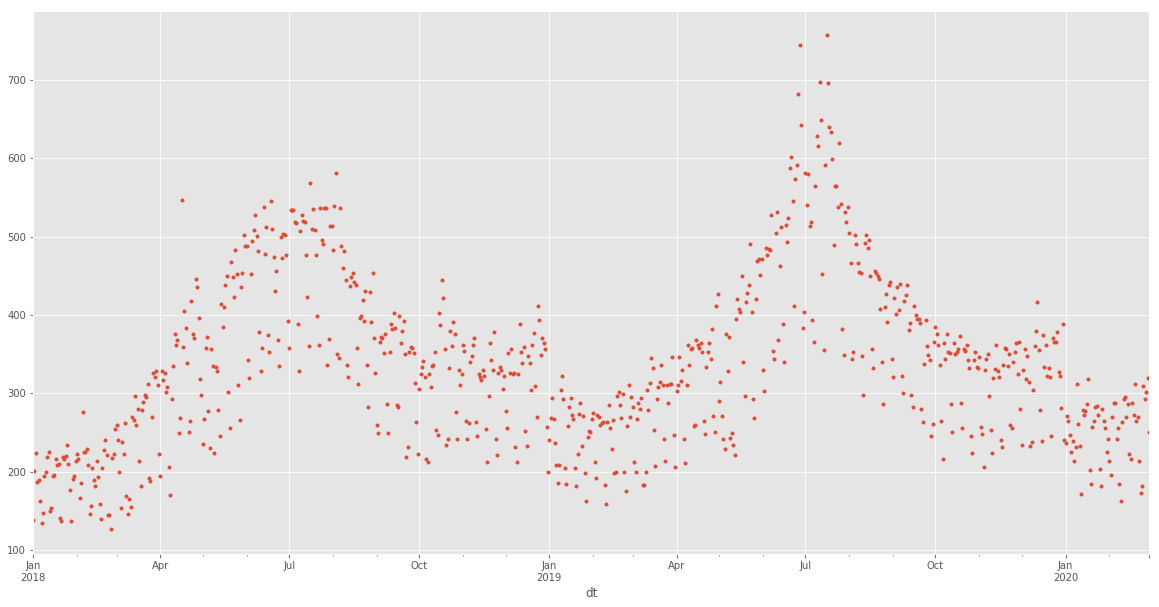

In [8]:
df_Shoes.set_index('dt')['calls'].plot(marker='.',linestyle='None', figsize=(20, 10))

Из графика видно, что есть сезонность по звонкам. Это значит, что показатели будем считать для конкретного месяца.

Посчитаем кол-во звонков в час в майские месяца

In [9]:
may_days = 31
hours = 24
round(df_Shoes[df_Shoes['month']==5]['calls'].sum()/(may_days*2*hours))

15.0

Теперь найдем среднее время одного звонка в майские месяцы используя медиану

In [10]:
avg_min = round(df_Shoes[df_Shoes['month']==5]['avg_min'].median(), 2)
minute = int(avg_min)
sec = round((avg_min - minute) * 60)
print(str(minute)+'m '+ str(sec) + 'sec')

4m 32sec


Теперь имея все данные, расчитаем необходимое кол-во операторов на лини в час, использую Калькулятор Эрланга C. А именно: 
###### 1) Среднее время разговора =  4м 32с
###### 2) Среднее время постобработки (не задано, берем по умолчанию)
###### 3) Число звонков в час = 15
###### 4) Целевое время ожидания клиента на линии (не более) = 20 (задано из SL)
На уровне обслуживания >80% получаем кол-во операторов = 3

In [11]:
operator_shoes_count = 3

Теперь расчитаем оплату операторов за категорию Обувь с учетом, что контакт-центр обслуживает 24/7

In [12]:
operator_pay = 200
pay_for_shoes_operator = operator_shoes_count * operator_pay * hours * may_days
pay_for_shoes_operator

446400

Теперь расчитаем для кат-ий Одежда и Аксессуары 

### Для  кат-ий Одежда и Аксессуары


На графике распределения звонков тоже наблюдается сезонность

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013DBCD04630>],
      dtype=object)

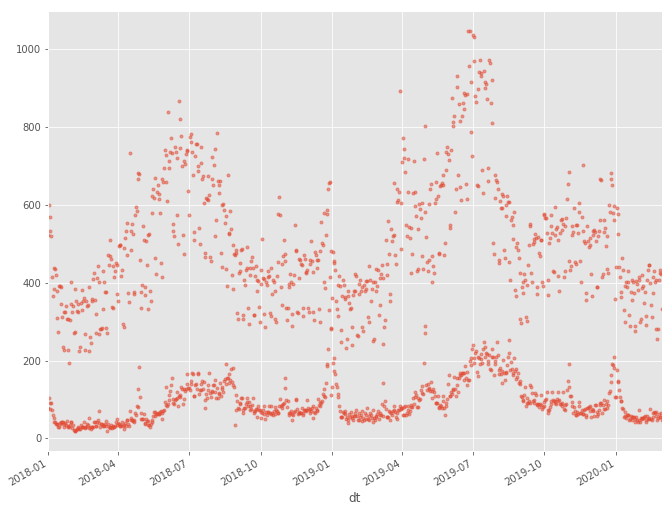

In [13]:
df_Other.set_index('dt')['calls'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

Посчитаем кол-во звонков в час в майские месяца

In [14]:
round(df_Other[df_Other['month']==5]['calls'].sum()/(may_days*2*hours))

27.0

Теперь найдем среднее время одного звонка в майские месяцы используя медиану

In [15]:
avg_min = round(df_Other[df_Other['month']==5]['avg_min'].median(), 2)
minute = int(avg_min)
sec = round((avg_min - minute) * 60)
print(str(minute)+'m '+ str(sec) + 'sec')

4m 37sec


Теперь имея все данные, расчитаем необходимое кол-во операторов на лини в час, использую Калькулятор Эрланга C. А именно: 
###### 1) Среднее время разговора =  4м 37с
###### 2) Среднее время постобработки (не задано, берем по умолчанию)
###### 3) Число звонков в час = 27
###### 4) Целевое время ожидания клиента на линии (не более) = 20 (задано из SL)
На уровне обслуживания >80% получаем кол-во операторов = 5

In [16]:
operator_count = 5

Теперь расчитаем оплату операторов за категорию Одежда и Аксессуары с учетом, что контакт-центр обслуживает 24/7

In [17]:
pay_for_other_operator = operator_count * operator_pay * hours * may_days
pay_for_other_operator

744000

### Итог

Затраты на контакт-центр, кот-ые понесет компания в мае 2020

In [18]:
pay_for_shoes_operator + pay_for_other_operator

1190400

А теперь в разрезе трех департаментов 

In [22]:
n = df_Other[df_Other['month']==5]['calls'].sum()
parts = [int(x/n*pay_for_other_operator) for x in list(df_Other[df_Other['month']==5].groupby(['department']).sum()['calls'])]
parts.append(pay_for_shoes_operator)
parts

[97436, 646563, 446400]

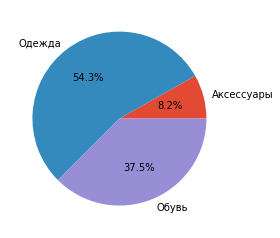

In [23]:
cat =  'Аксессуары', 'Одежда' ,'Обувь'
plt.pie(parts, labels=cat, autopct='%1.1f%%');